# 1.小组成员
郭晓东、宁洁、阮汉成

# 2.选题
北上广深租房状况分析

# 3.分析目标
（1）各城市房源数量
（2）各地区数据清洗后的房源数量
（3）单位面积房价
（4）北上广深GDP情况
（5）据地铁口远近对每平米租金的影响
（6）房屋大小对每平米租金的影响
（7）个人房和公寓房

# 4.数据清洗步骤

## 4.1 csv文件信息读取

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot') #使用自带的样式进行美化
from pylab import mpl #画线的模块
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [11]:
#读取data_sample.csv中的有效字段的数据
zf = pd.read_csv('C:\\Users\\27904\\Desktop\\Python课程设计\\interesting-python-master\\BSGS_Rent\\data_sample.csv')[['city','dist','layout','rent_area','rent_price_listing','rent_price_unit']]
zf

,city,dist,layout,rent_area,rent_price_listing,rent_price_unit
0,北京,海淀,3室2厅2卫,137,15000,元/月
1,北京,丰台,2室1厅1卫,57,4500,元/月
2,北京,朝阳,1室1厅1卫,56,10500,元/月
3,北京,西城,1室1厅1卫,43,5600,元/月
4,北京,朝阳,2室1厅1卫,56,6300,元/月
...,...,...,...,...,...,...
11995,深圳,南山区,3室2厅2卫,200,25000,元/月
11996,深圳,福田区,1室1厅1卫,62,8500,元/月
11997,深圳,南山区,1室0厅1卫,20,2580,元/月
11998,深圳,龙岗区,1室1厅1卫,44,3300,元/月


## 4.2 去重

In [29]:
#读取data_sample.csv中的有效字段的数据
zf = pd.read_csv('C:\\Users\\27904\\Desktop\\Python课程设计\\interesting-python-master\\BSGS_Rent\\data_sample.csv')[['city','dist','layout','rent_area','rent_price_listing','rent_price_unit']]
print("原始行数:",len(zf))

原始行数: 12000


In [30]:
#去重，并生成新索引删除原索引
zf=zf.drop_duplicates().reset_index().drop('index',axis=1)  
print('现在数据行数:',len(zf))
zf

现在数据行数: 11564


,city,dist,layout,rent_area,rent_price_listing,rent_price_unit
0,北京,海淀,3室2厅2卫,137,15000,元/月
1,北京,丰台,2室1厅1卫,57,4500,元/月
2,北京,朝阳,1室1厅1卫,56,10500,元/月
3,北京,西城,1室1厅1卫,43,5600,元/月
4,北京,朝阳,2室1厅1卫,56,6300,元/月
...,...,...,...,...,...,...
11559,深圳,南山区,3室2厅2卫,200,25000,元/月
11560,深圳,福田区,1室1厅1卫,62,8500,元/月
11561,深圳,南山区,1室0厅1卫,20,2580,元/月
11562,深圳,龙岗区,1室1厅1卫,44,3300,元/月


## 4.3 数据清洗

### 4.3.1 浴室信息处理

In [96]:
data['bathroom_num'].unique()

array([2, 1, 3, 5, 0, 4, 9, 7, 6, 8], dtype=int64)

In [101]:
data[data['bathroom_num'].isin(['8','9'])]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
1206,5c715165397be4c5251a817e,9,9,北七家,北京,昌平,NaN,东 南 西 北,5,精装,整租 · 精装修独栋别墅，家具家电齐全，可直接入住！,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,544,40000,元/月,麦卡伦地,整租
3778,5c7195d1397be4c5251b53b3,8,6,龙柏,上海,闵行,528.0,南 北,3,近地铁,整租 · 性价别墅，可整租可分层出租，价格可谈，看房方便！,31.186340,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,949,75000,元/月,汇金公寓,整租
6152,5c727595397be4c5251d7ab0,8,20,滨江东,广州,海珠,968.0,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
7540,5c727584397be4c5251d7a78,8,20,滨江东,广州,海珠,968.0,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
8883,5c72464a397be4c5251d030e,8,9,白云大道南,广州,白云,594.0,南 北,3,近地铁,珠江岭南苑 南北向 视野开阔景观好,23.202732,9室3厅8卫,113.286666,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,500,80000,元/月,珠江岭南苑,整租


1206行的住房面积为空，是异常数据，所以进行异常数据的处理

In [102]:
data = data.drop([1206])

In [103]:
data[data['bathroom_num'].isin(['8','9'])]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
3778,5c7195d1397be4c5251b53b3,8,6,龙柏,上海,闵行,528.0,南 北,3,近地铁,整租 · 性价别墅，可整租可分层出租，价格可谈，看房方便！,31.186340,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,949,75000,元/月,汇金公寓,整租
6152,5c727595397be4c5251d7ab0,8,20,滨江东,广州,海珠,968.0,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
7540,5c727584397be4c5251d7a78,8,20,滨江东,广州,海珠,968.0,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
8883,5c72464a397be4c5251d030e,8,9,白云大道南,广州,白云,594.0,南 北,3,近地铁,珠江岭南苑 南北向 视野开阔景观好,23.202732,9室3厅8卫,113.286666,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,500,80000,元/月,珠江岭南苑,整租


### 4.3.2 卧室信息处理

In [104]:
data['bedroom_num'].unique()

array([ 3,  2,  1,  4,  6,  5,  8,  7,  9, 20,  0, 13, 10], dtype=int64)

In [105]:
data[data['bedroom_num'].isin(['10','13','20'])]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
6152,5c727595397be4c5251d7ab0,8,20,滨江东,广州,海珠,968.0,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
7540,5c727584397be4c5251d7a78,8,20,滨江东,广州,海珠,968.0,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
9647,5c72a8fc397be4c5251e26d1,3,13,横岗,深圳,龙岗区,10.0,南,1,月租 近地铁 精装 新上 随时看房,合租 · 振业城 13室1厅,22.642763,13室1厅3卫,114.185174,https://m.lianjia.com/chuzu/sz/zufang/SZ219611...,15,1480,元/月,振业城,合租
10814,5c72951a397be4c5251de31f,7,10,布吉大芬,深圳,龙岗区,582.0,东南,3,近地铁,龙泉别墅 10室3厅 25000元,22.622112,10室3厅7卫,114.151512,https://m.lianjia.com/chuzu/sz/zufang/SZ213328...,333,25000,元/月,龙泉别墅,整租


无异常数据，卧室多的都是用来合租的，不是合租也是住房面积本身很大

### 4.3.3 城市信息处理

In [106]:
data['city'].unique()

array(['北京', '上海', '广州', '深圳'], dtype=object)

可见城市信息中除了北京上海广州深圳外无其他数据，故城市信息无异常

### 4.3.4 玄关信息处理

In [107]:
data['hall_num'].unique()

array([2, 1, 0, 3, 4, 5], dtype=int64)

In [110]:
data[data['hall_num'].isin(['5'])]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
4680,5c72cfe0397be4c5251e8329,5,9,张江,上海,浦东,NaN,南,5,精装,汤臣高尔夫独栋别墅|大花园 露台| 房间设施配套齐 复式,31.225384,9室5厅5卫,121.5882,https://m.lianjia.com/chuzu/sh/zufang/SH195832...,436,80000,元/月,汤臣高尔夫(别墅),整租


无异常数据

### 4.3.5 租房面积信息处理

In [234]:
data.sample(5)['rent_area'] #功能类似于numpy.random.choice  

8580     55.0
4982     94.0
1427     47.0
10930    24.0
11191    91.0
Name: rent_area, dtype: float64

In [112]:
#rent_area字段有些填写的是一个范围，比如23-25平方米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [212]:
data[data['rent_area'] < 5]

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,...,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,is_dep


没有租房面积小于5的异常数据

### 4.3.6 租房价格单位信息处理

In [116]:
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [117]:
# 租金都是以“元/月”计算的，所以这一列没用了，可以删了
data = data.drop(columns='rent_price_unit')

### 4.3.7 租房价格信息处理

In [119]:
#租房价格的数据有的写入的是区间，因此查找关键词“-”将带有区间的价格找出来
data[data['rent_price_listing'].str.contains('-')].sample(100)

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
10982,5c728e2c397be4c5251dc8bd,1,1,福永,深圳,宝安区,NaN,东南,0,独栋公寓,职业房东 福永暖家公寓 精装修大单间 开间,22.664605,1室0厅1卫,113.826762,https://m.lianjia.com/chuzu/sz/apartment/layou...,25.0,1680-1740,NaN,整租
7513,5c71abb7397be4c5251b94f7,1,1,车陂,广州,天河,NaN,NaN,0,独栋公寓 近地铁,职业房东 畅享公寓车陂店 近BRT和近地铁单间 开间,23.127579,1室0厅1卫,113.407080,https://m.lianjia.com/chuzu/gz/apartment/layou...,16.0,800-850,NaN,整租
10911,5c72990e397be4c5251df13d,1,1,横岗,深圳,龙岗区,NaN,东南,1,独栋公寓 月租 近地铁,职业房东 君君公寓塘坑C栋 精装一房一厅,22.643961,1室1厅1卫,114.201101,https://m.lianjia.com/chuzu/sz/apartment/layou...,42.5,1400-1500,NaN,整租
9276,5c729225397be4c5251dd829,1,1,西乡,深圳,宝安区,NaN,南,0,独栋公寓 月租,米琪公寓 固戍三围2店 精致大单间 开间,22.618391,1室0厅1卫,113.851430,https://m.lianjia.com/chuzu/sz/apartment/layou...,24.0,950-1050,NaN,整租
8690,5c724f17397be4c5251d1a86,1,2,嘉禾望岗,广州,白云,NaN,南,1,独栋公寓 近地铁,职业房东 金领电梯公寓 嘉禾望岗店 ❤️两房一厅 二居+,23.240703,2室1厅1卫,113.286130,https://m.lianjia.com/chuzu/gz/apartment/layou...,70.0,1800-2000,NaN,整租
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,5c71c487397be4c5251bd372,1,1,龙溪,广州,荔湾,NaN,南,1,独栋公寓 近地铁,梦之家公馆 菊树梦之家公馆二期店 经典一房一厅,23.069304,1室1厅1卫,113.219974,https://m.lianjia.com/chuzu/gz/apartment/layou...,43.0,800-900,NaN,整租
11327,5c72914a397be4c5251dd4d5,1,1,新安,深圳,宝安区,NaN,东 东南,1,独栋公寓 近地铁,河豚公寓 上合1店 单间豪华大套房,22.579568,1室1厅1卫,113.907230,https://m.lianjia.com/chuzu/sz/apartment/layou...,32.5,2280-2300,NaN,整租
9185,5c729a74397be4c5251df61b,1,2,龙岗中心城,深圳,龙岗区,NaN,NaN,1,独栋公寓,希悦公寓 新生店 两房一厅 二居+,22.752033,2室1厅1卫,114.271529,https://m.lianjia.com/chuzu/sz/apartment/layou...,40.0,1499-1788,NaN,整租
11286,5c729750397be4c5251deb43,1,1,布吉南岭,深圳,龙岗区,NaN,东 东南 南 西南 西 北,0,独栋公寓 押一付一,柚米国际社区 柚米(深圳1983创意小镇店) 舒适小清新 开间,22.611152,1室0厅1卫,114.153162,https://m.lianjia.com/chuzu/sz/apartment/layou...,31.5,2977-3387,NaN,整租


In [120]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [122]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

# 5.数据分析

## 5.1 各城市数据清洗后的房源数量

In [154]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [127]:
get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])

北京的数据一共有2995条
上海的数据一共有2992条
广州的数据一共有2987条
深圳的数据一共有2994条


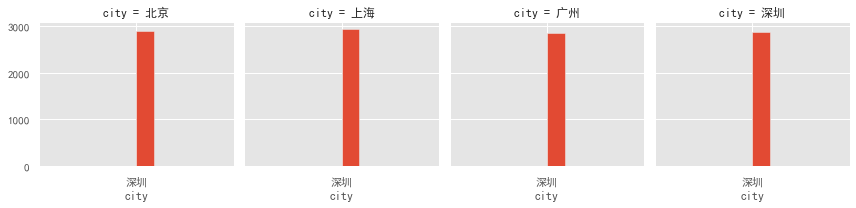

In [215]:
g = sns.FacetGrid(zf, col='city')
g.map(plt.hist,"city") 

清洗过后各城市的房源

## 5.2 各地区数据清洗后的房源数量

### 5.2.1 北京各地区房源数量

<ipython-input-217-256673d8a94c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

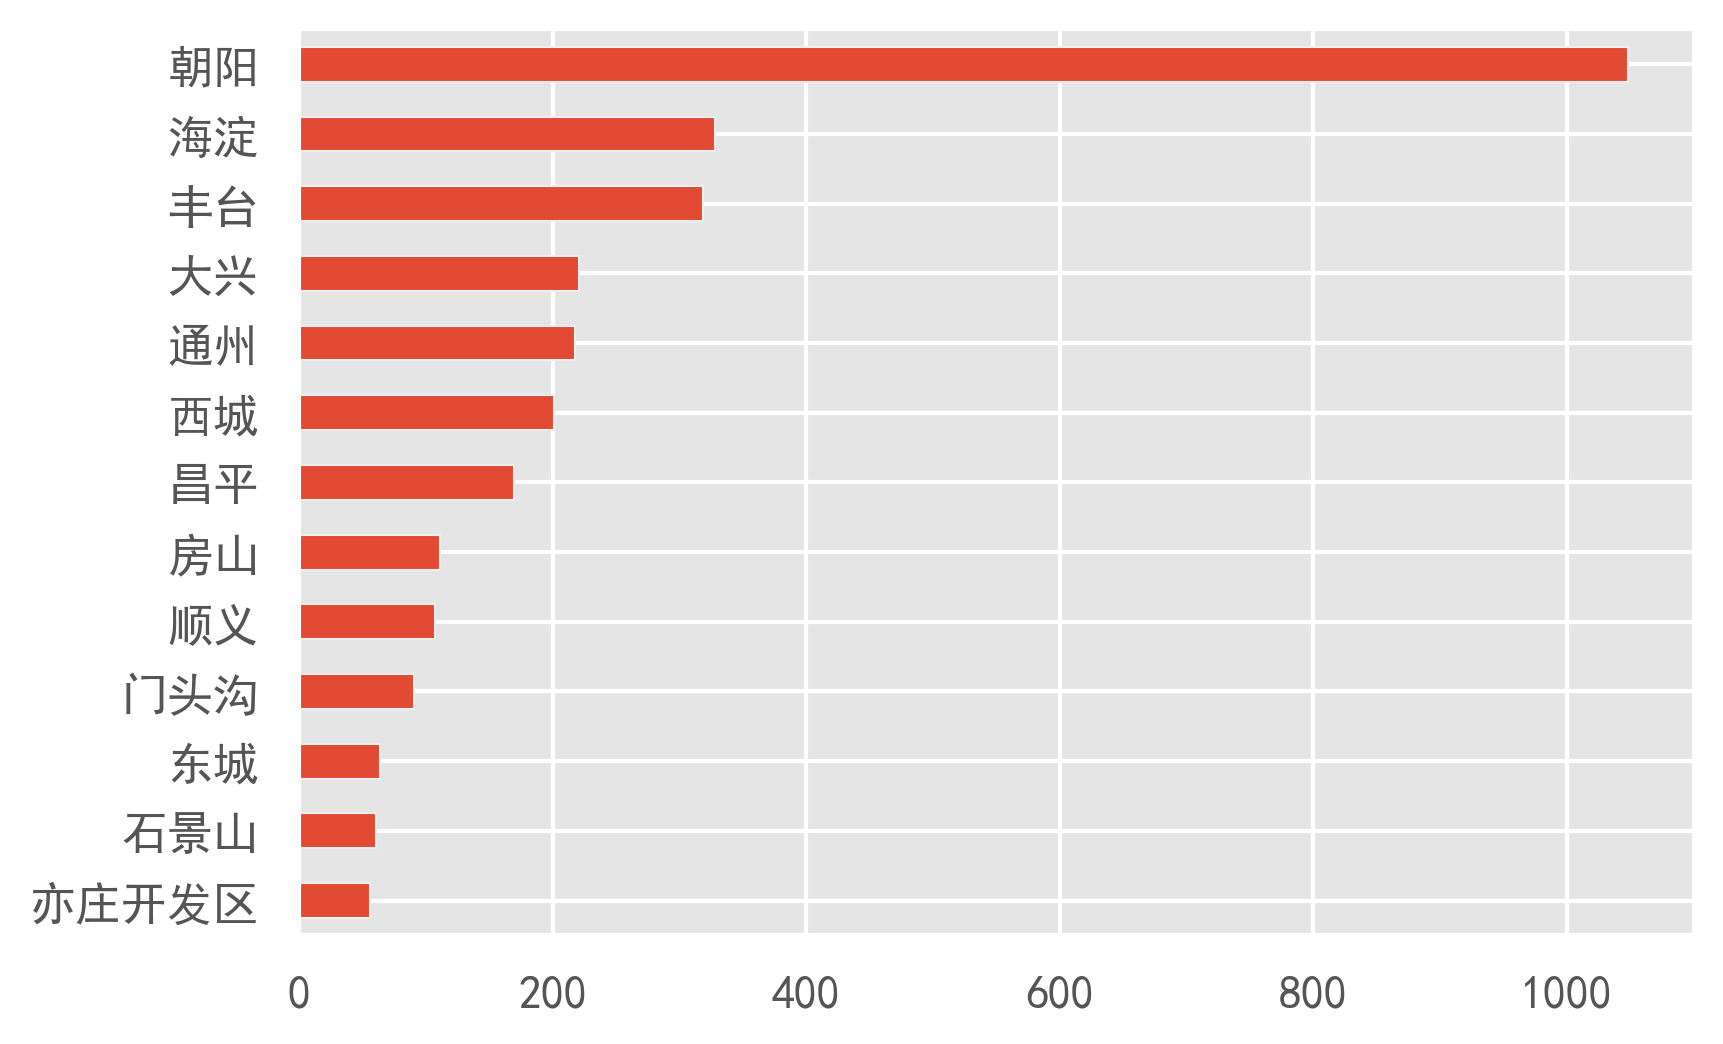

In [217]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()

In [ ]:
北京的租房房源有2996条，可以看到除了周边的昌平、顺义、通州、大兴、房山、门头沟等区中心有集中房源外，北京的房子主要集中在二环外四环内，
当然这片区域也是最贵的。其中朝阳区的房源最多，占了整个北京房源的1/3，海淀、丰台次之。

### 5.2.2 上海各地区房源数量

<ipython-input-156-2d0ff3883743>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

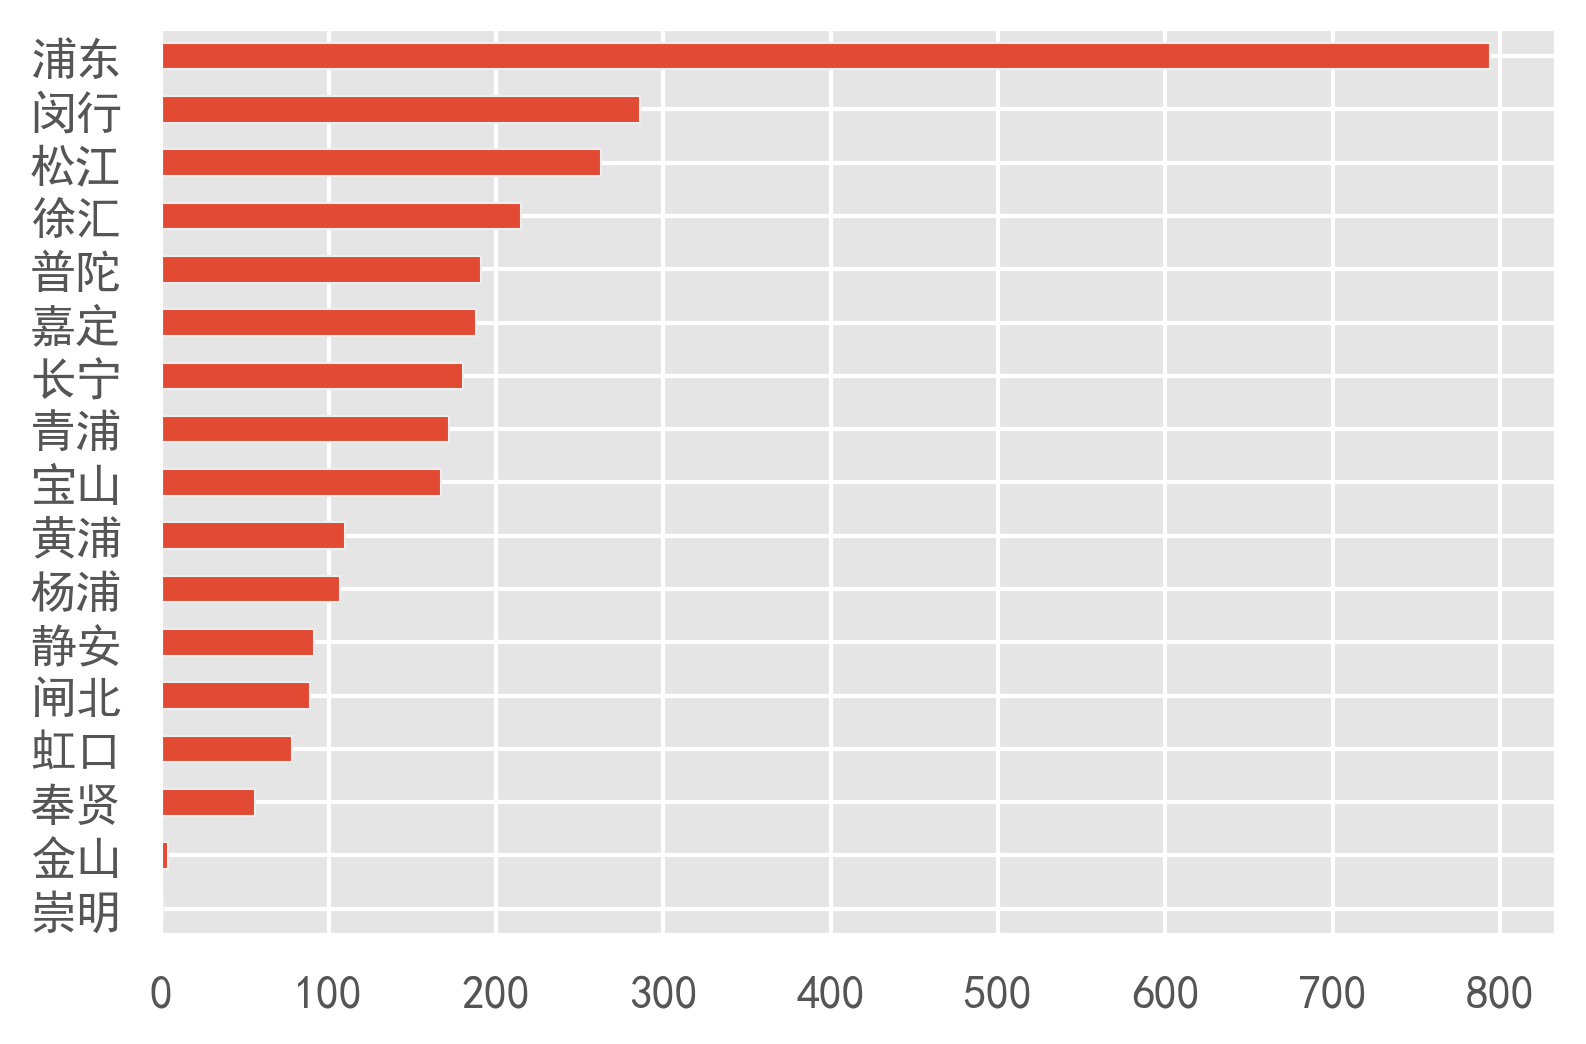

In [156]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()

上海也一样，除了周边的宝山、嘉定、青浦、松江、奉贤等区中心有房源外，房源主要集中在中心城区+浦东（地铁网范围内）。总共2992条房源，浦东就有800条，比例超过1/4。

### 5.2.3 广州各地区房源数量

<ipython-input-62-e691eac81ce6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

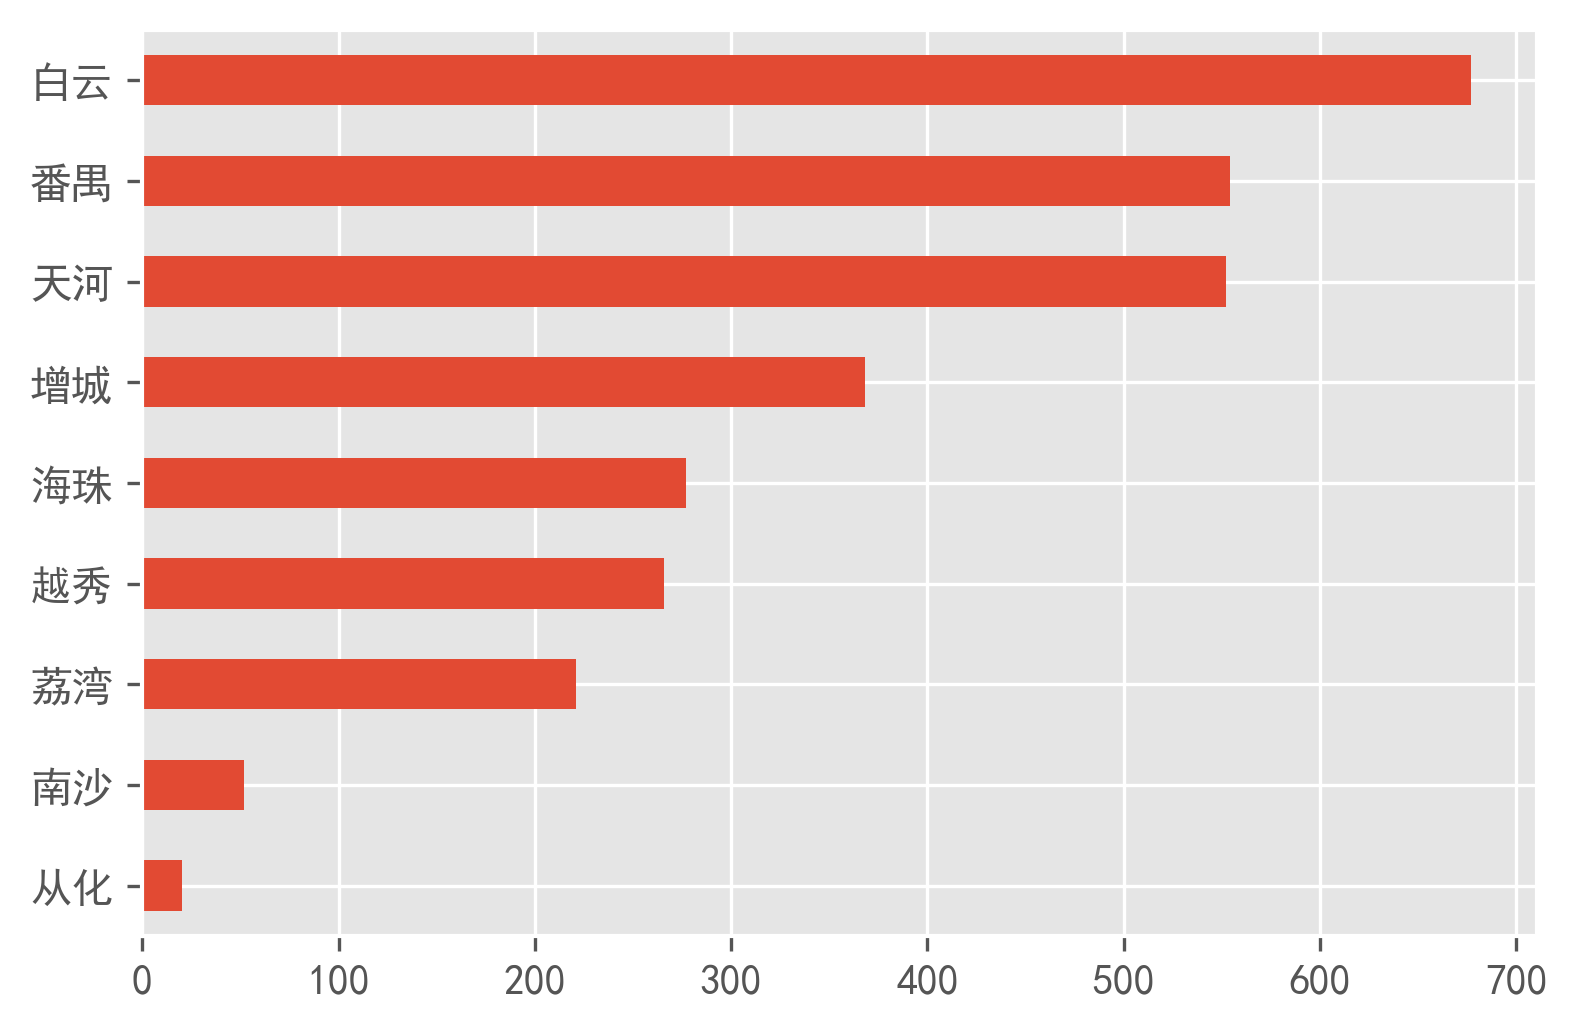

In [62]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()

广州房源主要集中在白云、天河、越秀、荔湾，以及海珠和番禺。其中白云、天河和番禺房源都超过1600条，选择丰富。

### 5.2.4 深圳各地区房源数量

<ipython-input-63-15f4cafdd4a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

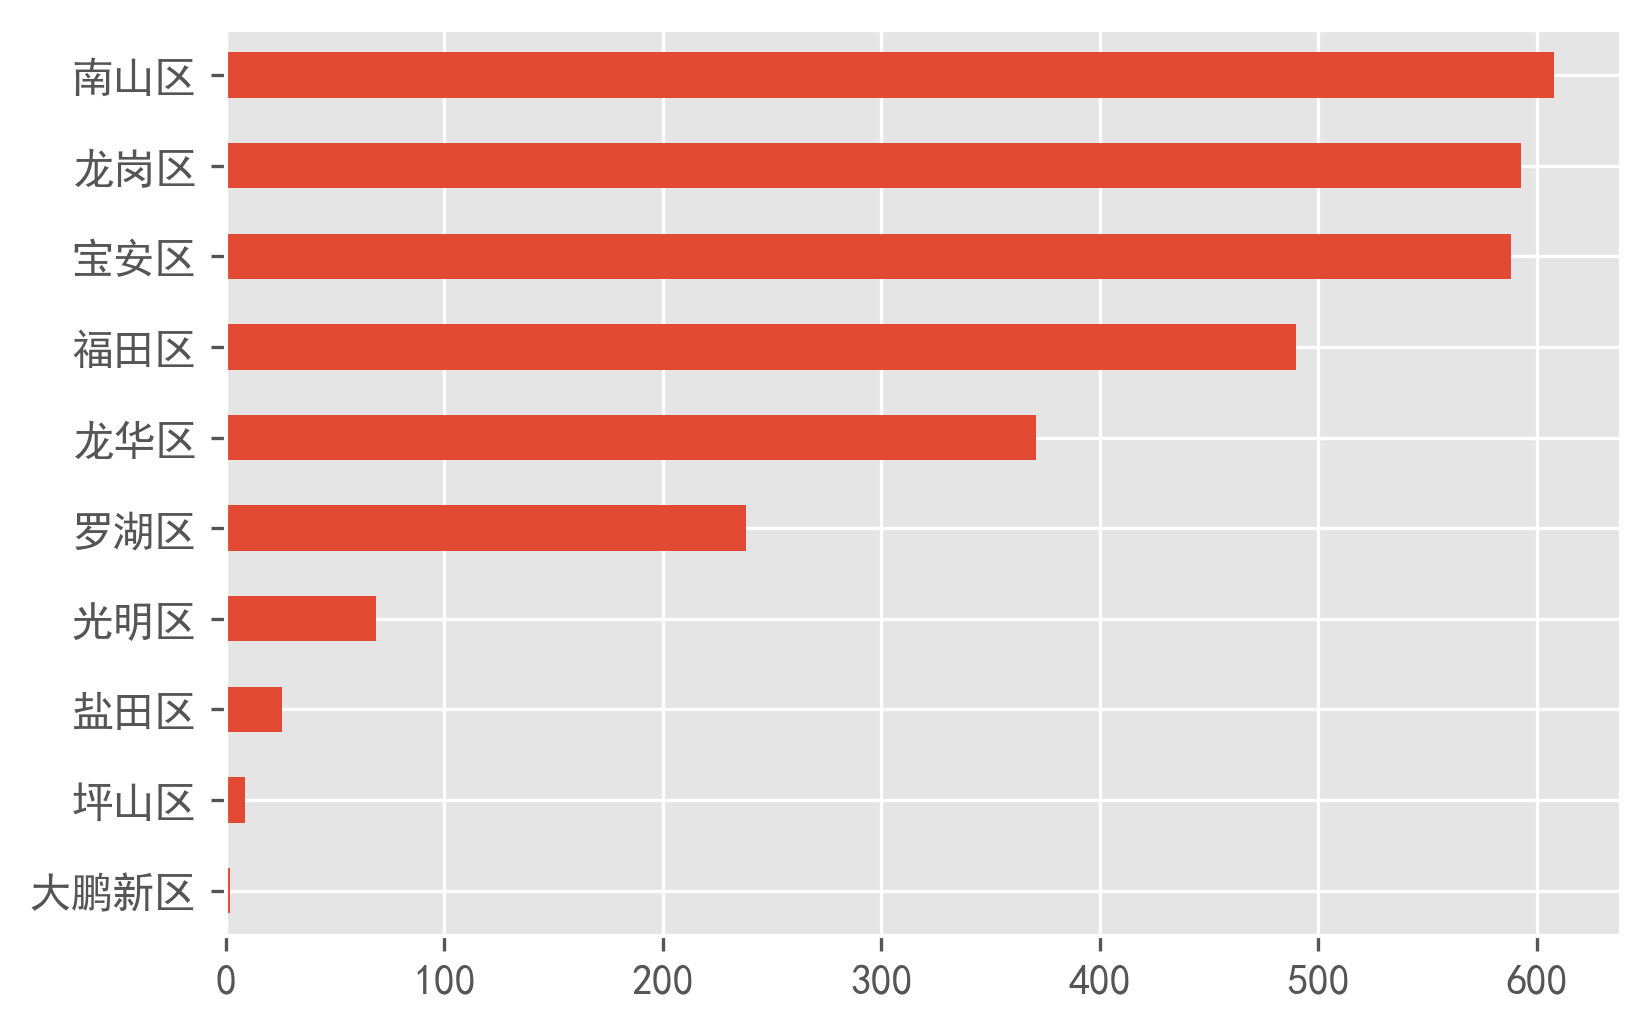

In [63]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()

深圳的房源共有2994条，更集中在各区，除了四个新区零星分布的房源外，主要还是分布在南山、龙岗、宝安

## 5.3 单位面积房价

In [124]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

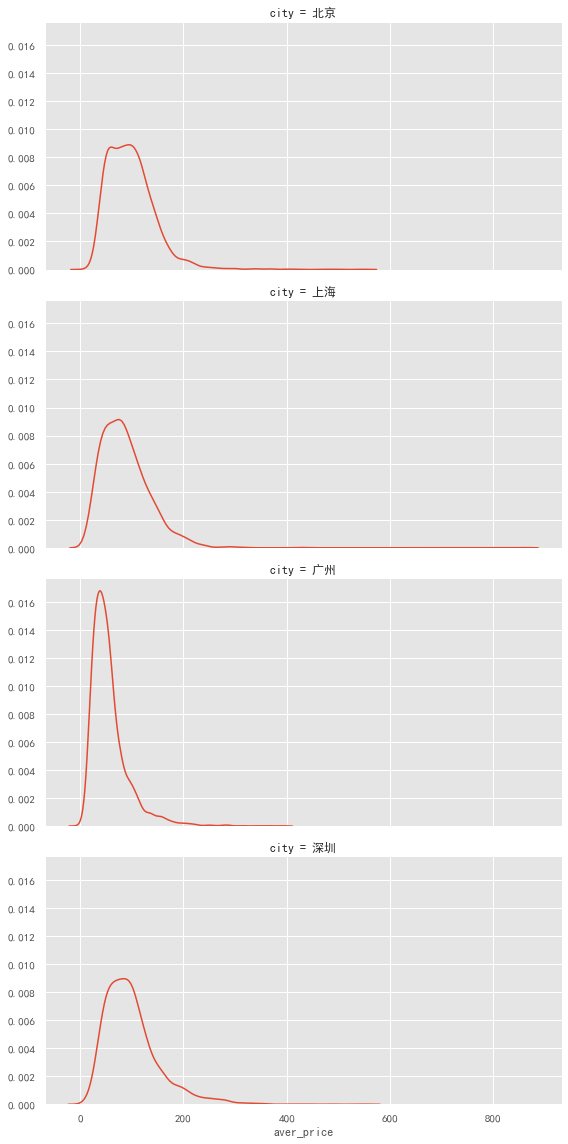

In [157]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

## 5.4 北上广深GDP情况

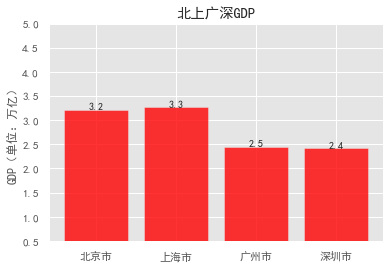

In [223]:
import matplotlib.pyplot as plt

GDP = [3.22,3.27,2.45,2.42]

# 绘图
plt.bar(range(4), GDP, align = 'center',color='red', alpha =0.8)
# 添加轴标签
plt.ylabel('GDP（单位：万亿）')
# 添加标题
plt.title('北上广深GDP')
# 添加刻度标签
plt.xticks(range(4),['北京市','上海市','广州市','深圳市'])
# 设置Y轴的刻度范围
plt.ylim([0.5,5])
# 为每个条形图添加数值标签    enumerate可以同时获得索引和值
for x,y in enumerate(GDP):
    plt.text(x,y,'%s' %round(y,1),ha='center')
# 显示图形
plt.show()

## 5.5 据地铁口远近对每平米租金的影响

In [184]:
from scipy import stats    #scipy库，科学计算

In [188]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg")
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

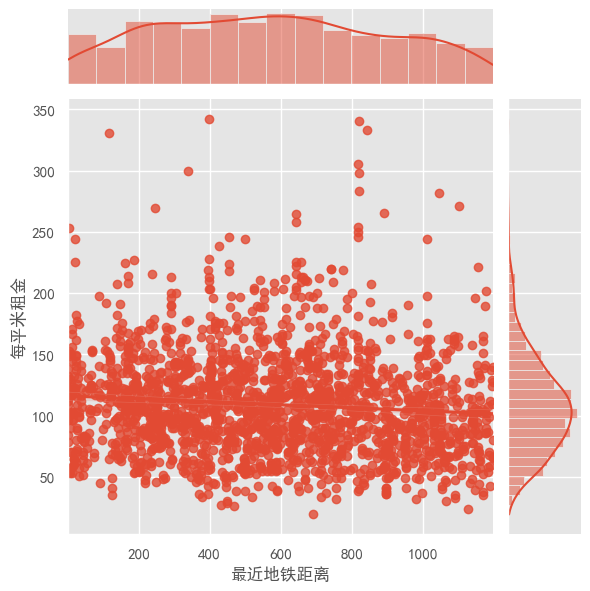

In [189]:
distance_price_relation('北京')

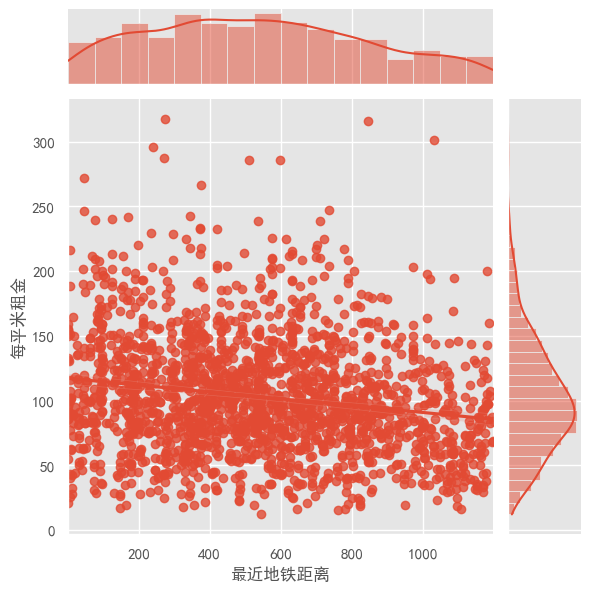

In [190]:
distance_price_relation('上海')

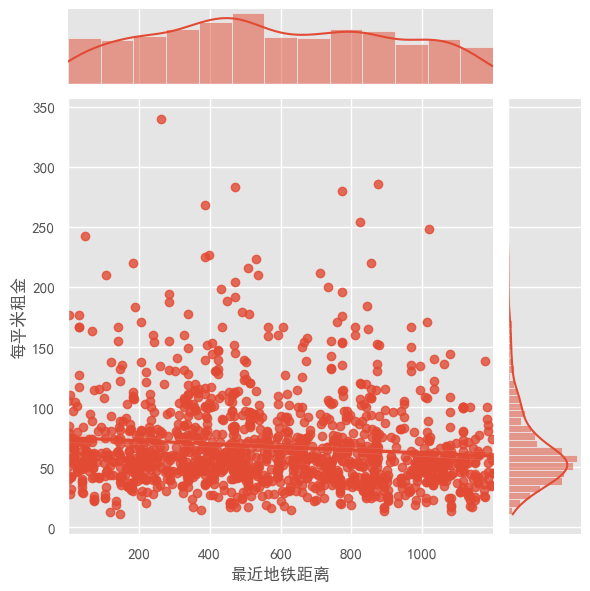

In [191]:
distance_price_relation('广州')

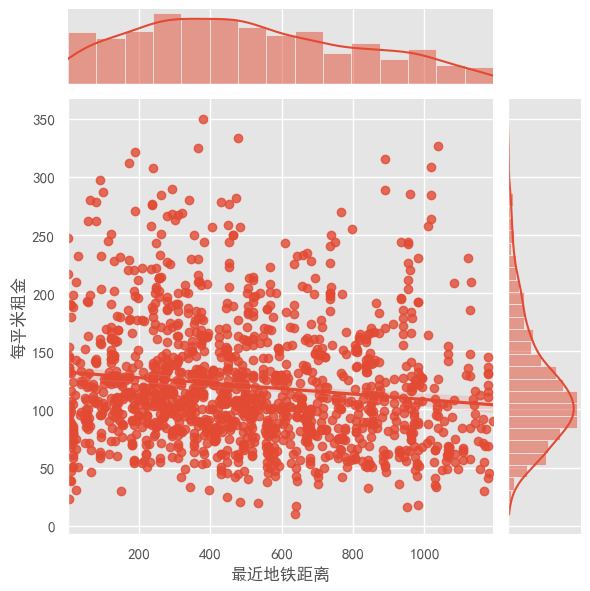

In [192]:
distance_price_relation('深圳')

可以看到，最近地铁距离和每平米租金之间当然是有相关性的，距离地铁越近，租金越贵。北上广深的相关系数分别是-0.13，-0.17，-0.12，-0.13，可见，上海地铁站的距离对租金的影响最大，广州最小。

## 5.6 房屋大小对每平米租金的影响

In [193]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(data['rent_area']<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

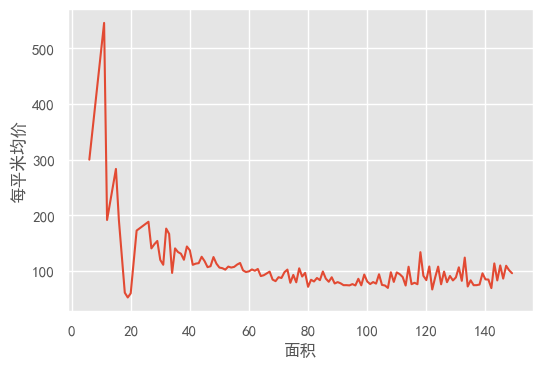

In [194]:
area_price_relation('北京')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

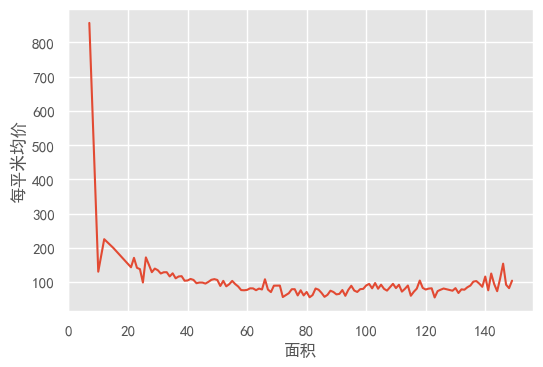

In [195]:
area_price_relation('上海')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

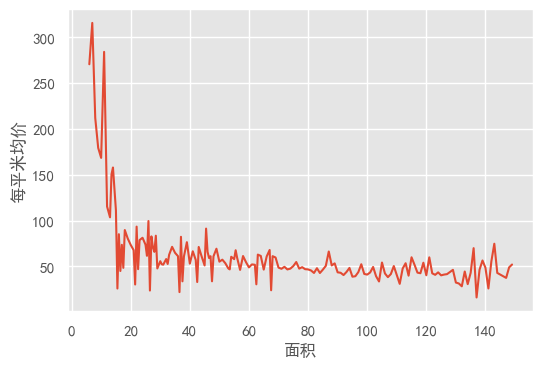

In [196]:
area_price_relation('广州')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

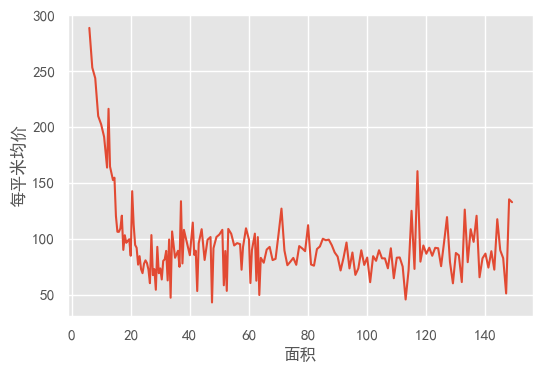

In [197]:
area_price_relation('深圳')

不管是哪个城市，出租面积在15平米以内的房子每平米租金都是最贵的，当然这里不排除租金贵的区域有更多单独出租的小房间这个原因。但是还是可以看出来，如果有认识的好友一起租大房子，不仅每平米的租金更便宜，而且还可以有一个大点的公用客厅。

## 5.7 个人房和公寓房

In [198]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [199]:
# 每个城市房源的公寓占比
for city in ['北京', '上海', '广州', '深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

北京的公寓占总房源量比重为:2.0%。
上海的公寓占总房源量比重为:4.17%。
广州的公寓占总房源量比重为:20.23%。
深圳的公寓占总房源量比重为:49.87%。


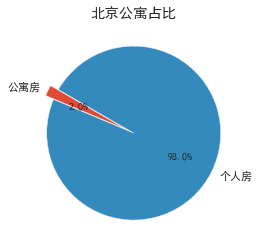

In [229]:
plt.rcParams['font.sans-serif']=['SimHei'] 
labels = ['公寓房','个人房']
sizes = [2,98]
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("北京公寓占比")
plt.show()  

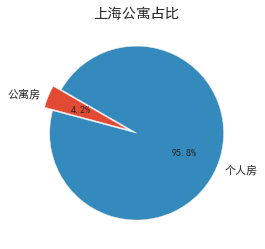

In [230]:
plt.rcParams['font.sans-serif']=['SimHei'] 
labels = ['公寓房','个人房']
sizes = [4.17,95.83]
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("上海公寓占比")
plt.show()  

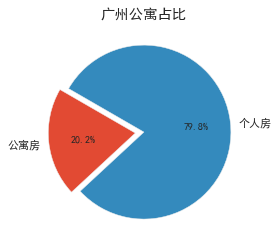

In [231]:
plt.rcParams['font.sans-serif']=['SimHei'] 
labels = ['公寓房','个人房']
sizes = [20.23,79.77]
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("广州公寓占比")
plt.show()  

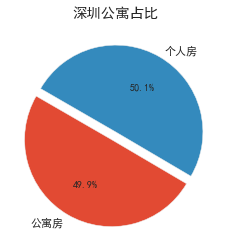

In [232]:
plt.rcParams['font.sans-serif']=['SimHei'] 
labels = ['公寓房','个人房']
sizes = [49.87,50.13]
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("深圳公寓占比")
plt.show()  